In [1]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'CHOOSEDDATA.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Function to recalculate and correct statistics for each row
def recalculate_and_correct_statistics(data):
    for index, row in data.iterrows():
        # Extract the raw data values
        Z_values = [row['Z'], row['Z.1'], row['Z.2']]
        Deg_values = [row['Deg'], row['Deg.1'], row['Deg.2']]
        
        # Recalculate values
        Z_mean = np.mean(Z_values)
        Z_median = np.median(Z_values)
        Z_weighted_avg = np.average(Z_values, weights=Z_values)
        Z_geometric_mean = np.exp(np.mean(np.log(Z_values)))
        Z_harmonic_mean = len(Z_values) / np.sum(1.0 / np.array(Z_values))
        
        Deg_mean = np.mean(Deg_values)
        Deg_median = np.median(Deg_values)
        Deg_weighted_avg = np.average(Deg_values, weights=Deg_values)
        
        # Update the DataFrame with the recalculated values if they are incorrect
        if not np.isclose(row['Z_mean'], Z_mean, rtol=1e-05, atol=1e-08):
            data.at[index, 'Z_mean'] = Z_mean
        if not np.isclose(row['Z_median'], Z_median, rtol=1e-05, atol=1e-08):
            data.at[index, 'Z_median'] = Z_median
        if not np.isclose(row['Z_weighted_avg'], Z_weighted_avg, rtol=1e-05, atol=1e-08):
            data.at[index, 'Z_weighted_avg'] = Z_weighted_avg
        if not np.isclose(row['Z_geometric_mean'], Z_geometric_mean, rtol=1e-05, atol=1e-08):
            data.at[index, 'Z_geometric_mean'] = Z_geometric_mean
        if not np.isclose(row['Z_harmonic_mean'], Z_harmonic_mean, rtol=1e-05, atol=1e-08):
            data.at[index, 'Z_harmonic_mean'] = Z_harmonic_mean
        if not np.isclose(row['Deg_mean'], Deg_mean, rtol=1e-05, atol=1e-08):
            data.at[index, 'Deg_mean'] = Deg_mean
        if not np.isclose(row['Deg_median'], Deg_median, rtol=1e-05, atol=1e-08):
            data.at[index, 'Deg_median'] = Deg_median
        if not np.isclose(row['Deg_weighted_avg'], Deg_weighted_avg, rtol=1e-05, atol=1e-08):
            data.at[index, 'Deg_weighted_avg'] = Deg_weighted_avg
    
    return data

# Recalculate and correct statistics
data_corrected = recalculate_and_correct_statistics(data)

# Display the corrected values
print(data_corrected.head())

# Save the corrected data to a new CSV file
data_corrected.to_csv('corrected_CHOOSEDDATA.csv', index=False)
print("Corrected data saved successfully.")

       Frequency         Z     Deg       Z.1   Deg.1       Z.2   Deg.2  \
0      10.000000   85042.0 -76.231   89189.0 -77.743   90240.0 -77.253   
1  314271.147965  140406.0 -15.409  134863.0 -15.623  132436.0 -15.754   
2  304705.099338  130828.0 -16.057  130720.0 -16.075  130733.0 -16.092   
3  304705.099338  131855.0 -15.947  131347.0 -15.989  131009.0 -16.027   
4  304705.099338  140761.0 -15.512  135204.0 -15.743  132786.0 -15.885   

          Z_mean  Z_median  Z_weighted_avg  Z_geometric_mean  Z_harmonic_mean  \
0   88157.000000   89189.0    88157.000000      88128.142301     88098.997497   
1  135901.666667  134863.0   135901.666667     135861.012281    135820.650445   
2  130760.333333  130733.0   130760.333333     130760.324473    130760.315614   
3  131403.666667  131347.0   131403.666667     131403.206859    131402.747247   
4  136250.333333  135204.0   136250.333333     136209.706609    136169.373388   

    Deg_mean  Deg_median  Deg_weighted_avg    label  
0 -77.075667  

label
D_10-8     2500
B_10-7     2500
A_10-3     2500
A_10-4     2500
A_10-5     2500
A_10-6     2500
A_10-7     2500
A_10-8     2500
B_10-3     2500
B_10-4     2500
B_10-5     2500
B_10-6     2500
B_10-8     2500
C_10-3     2500
C_10-4     2500
C_10-5     2500
C_10-6     2500
C_10-7     2500
C_10-8     2500
D_10-3     2500
D_10-4     2500
D_10-5     2500
D_10-7     2500
D_10-6     2000
AB_10-4    1500
CD_10-8    1500
CD_10-7    1500
AB_10-3    1500
CD_10-5    1500
CD_10-4    1500
AB_10-5    1500
AB_10-6    1500
AB_10-7    1500
AB_10-8    1500
AC_10-3    1500
AC_10-4    1500
AC_10-5    1500
AC_10-6    1500
AC_10-7    1500
AC_10-8    1500
AD_10-3    1500
AD_10-4    1500
AD_10-5    1500
AD_10-6    1500
AD_10-7    1500
AD_10-8    1500
BD_10-3    1500
BD_10-4    1500
BD_10-5    1500
BD_10-6    1500
BD_10-7    1500
BD_10-8    1500
CD_10-3    1500
CD_10-6    1500
Name: count, dtype: int64


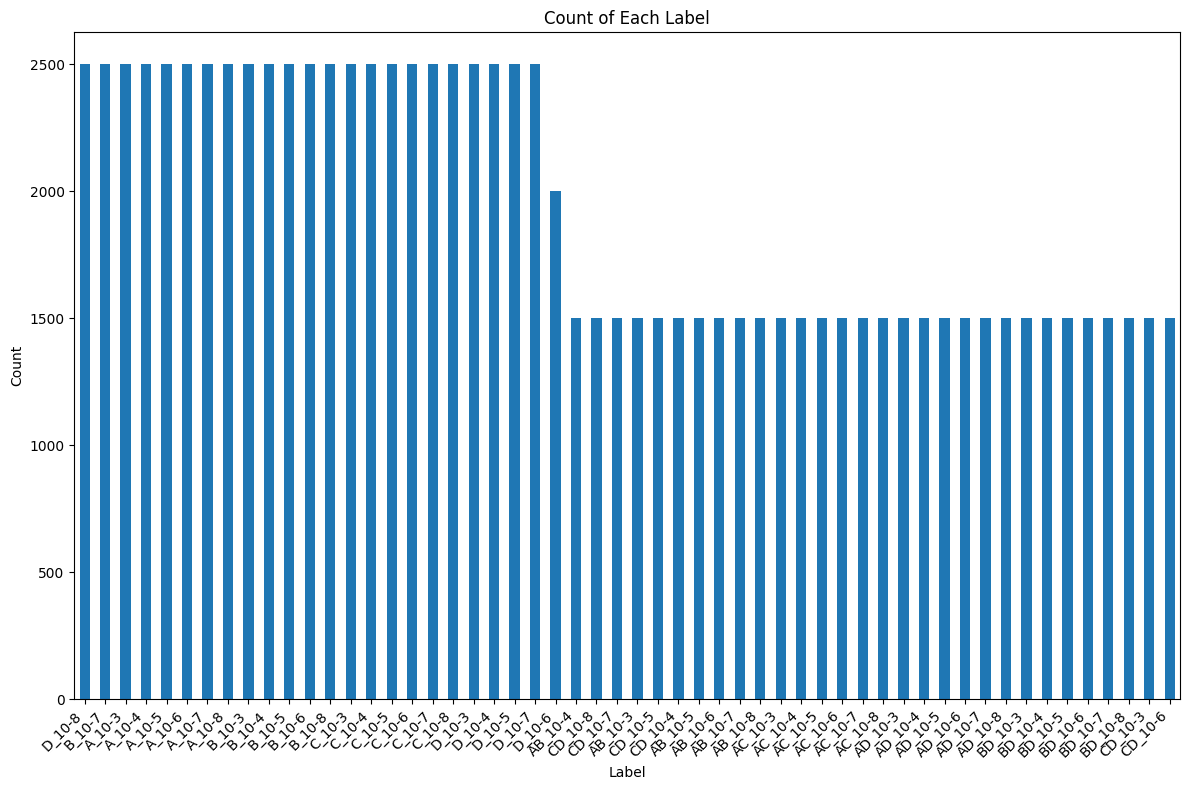

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'corrected_CHOOSEDDATA.csv'
data = pd.read_csv(file_path)

# Get the count of each value in the 'label' column
label_counts = data['label'].value_counts()

# Print the counts
print(label_counts)

# Plot the counts
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
label_counts.plot(kind='bar')
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

             Z_mean       Z_median  Z_weighted_avg  Z_geometric_mean  \
count  1.045000e+05  104500.000000    1.045000e+05      1.045000e+05   
mean   3.216310e+05  138208.190402    6.973565e+05      1.335063e+05   
std    2.668852e+06  234263.759056    7.973844e+06      2.283172e+05   
min    1.002000e+03    1001.000000    1.002000e+03      1.001999e+03   
25%    5.566000e+03    4847.750000    5.618345e+03      5.535090e+03   
50%    3.139333e+04   27030.000000    3.146361e+04      2.829759e+04   
75%    1.485552e+05  122655.500000    1.520732e+05      1.186728e+05   
max    1.038137e+08  999988.000000    3.105598e+08      2.472903e+06   

       Z_harmonic_mean       Deg_mean     Deg_median  Deg_weighted_avg  
count     1.045000e+05  104500.000000  104500.000000     104500.000000  
mean      1.277869e+05     -51.959205     -51.928571        -52.098155  
std       2.200441e+05      19.164309      19.317009         19.118307  
min       1.001998e+03     -83.738000     -84.102000       

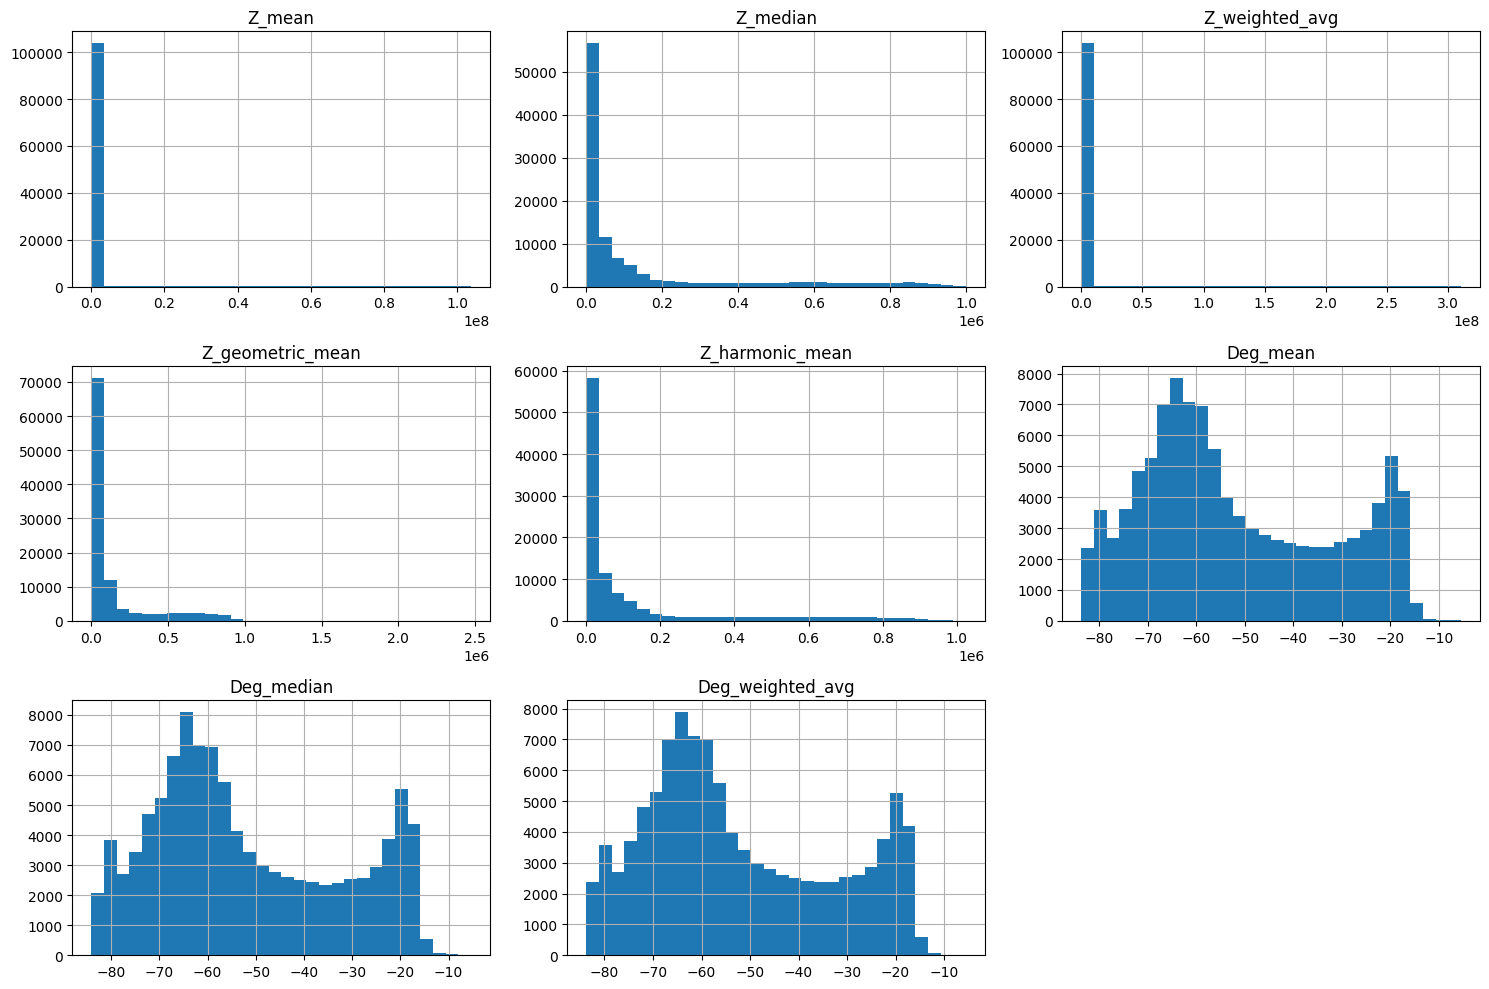

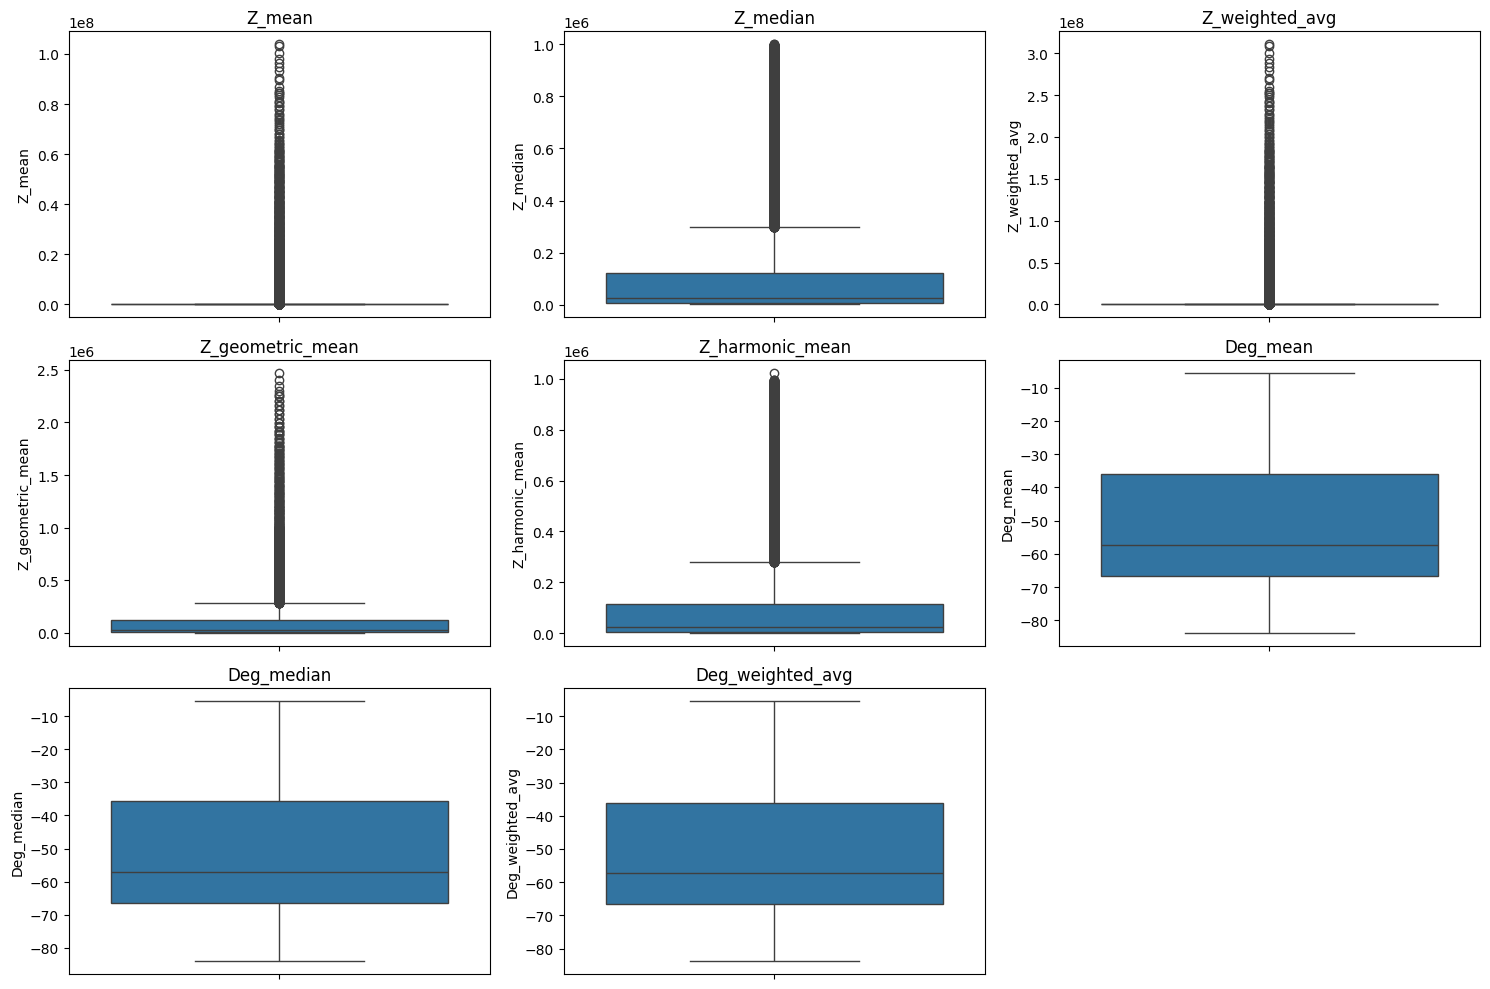

                    Z_mean  Z_median  Z_weighted_avg  Z_geometric_mean  \
Z_mean            1.000000  0.072292        0.998451          0.340871   
Z_median          0.072292  1.000000        0.017706          0.897365   
Z_weighted_avg    0.998451  0.017706        1.000000          0.288937   
Z_geometric_mean  0.340871  0.897365        0.288937          1.000000   
Z_harmonic_mean   0.084745  0.916471        0.030551          0.963985   
Deg_mean         -0.007845  0.130899       -0.014205          0.085897   
Deg_median       -0.007057  0.126215       -0.013177          0.081926   
Deg_weighted_avg -0.007829  0.131025       -0.014221          0.086592   

                  Z_harmonic_mean  Deg_mean  Deg_median  Deg_weighted_avg  
Z_mean                   0.084745 -0.007845   -0.007057         -0.007829  
Z_median                 0.916471  0.130899    0.126215          0.131025  
Z_weighted_avg           0.030551 -0.014205   -0.013177         -0.014221  
Z_geometric_mean         0.96

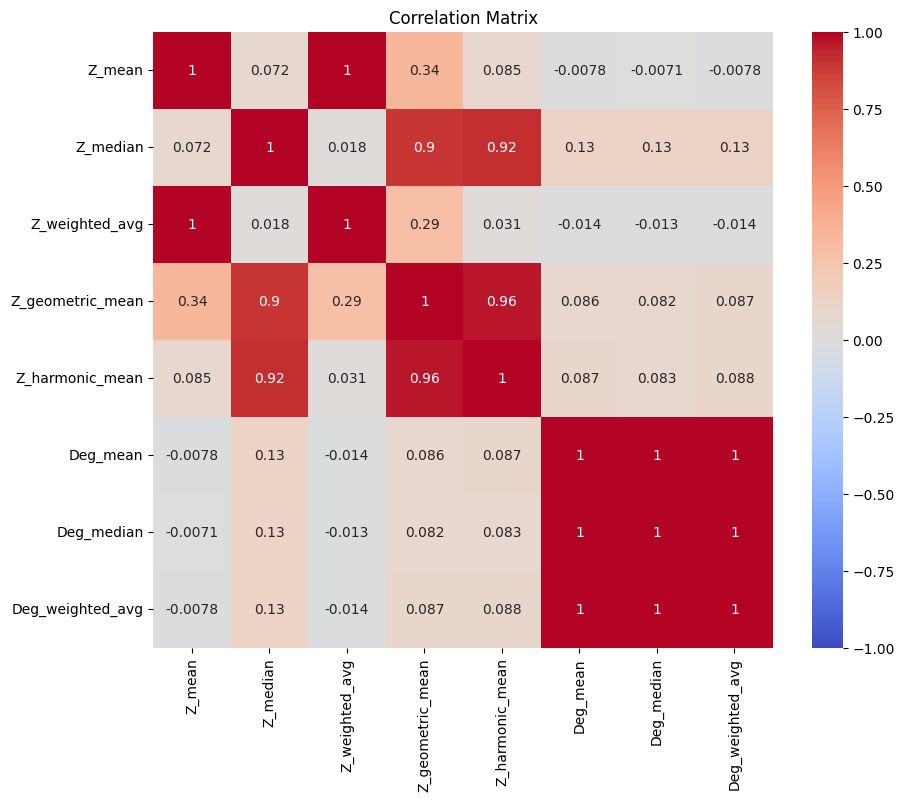

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'corrected_CHOOSEDDATA.csv'
data = pd.read_csv(file_path)

# List of columns to check
columns_to_check = [
    'Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean', 'Z_harmonic_mean',
    'Deg_mean', 'Deg_median', 'Deg_weighted_avg'
]

# Summary statistics
summary_stats = data[columns_to_check].describe()
print(summary_stats)

# Histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    data[column].hist(bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[columns_to_check].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('corrected_CHOOSEDDATA.csv')

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower bound
    upper_bound = Q3 + 1.5 * IQR      # Upper bound
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to relevant columns
for col in ['Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean']:
    df = remove_outliers_iqr(df, col)

# Save the cleaned data
df.to_csv('cleaned_dataset.csv', index=False)


In [6]:
import numpy as np

# Define a function to cap outliers
def cap_outliers(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)
    data[column] = np.clip(data[column], lower_bound, upper_bound)

# Apply the function to relevant columns
for col in ['Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean']:
    cap_outliers(df, col)

# Save the modified data
df.to_csv('capped_dataset.csv', index=False)


In [8]:
# Apply log transformation (add a small constant to avoid log(0))
for col in ['Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean']:
    df[col] = np.log1p(df[col])

# Save the transformed data
df.to_csv('transformed_dataset.csv', index=False)


In [10]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = df[['Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean']].apply(zscore)

# Filter out rows with z-scores above 3 or below -3
df = df[(z_scores < 3).all(axis=1)]

# Save the filtered data
df.to_csv('zscore_cleaned_dataset.csv', index=False)


      Frequency        Z     Deg      Z.1   Deg.1      Z.2   Deg.2     Z_mean  \
0  1.000000e+01  85042.0 -76.231  89189.0 -77.743  90240.0 -77.253  11.198954   
1  1.497625e+07  32351.0 -51.378  32334.0 -51.324  32323.0 -51.289  10.383967   
2  1.497625e+07  32545.0 -52.151  32440.0 -51.705  32377.0 -51.471  10.387610   
3  1.452039e+07  33074.0 -51.511  33068.0 -51.498  33066.0 -51.499  10.406392   
4  1.452039e+07  33112.0 -51.629  33096.0 -51.573  33083.0 -51.538  10.407228   

    Z_median  Z_weighted_avg  Z_geometric_mean  Z_harmonic_mean   Deg_mean  \
0  11.196615       11.202009         11.197632     88098.997497 -77.075667   
1  10.383906       10.383967         10.383967     32335.995898 -51.330333   
2  10.387178       10.387610         10.387608     32453.852130 -51.775667   
3  10.406352       10.406392         10.406392     33069.332984 -51.502667   
4  10.407198       10.407228         10.407228     33096.995750 -51.580000   

   Deg_median  Deg_weighted_avg    label  
0

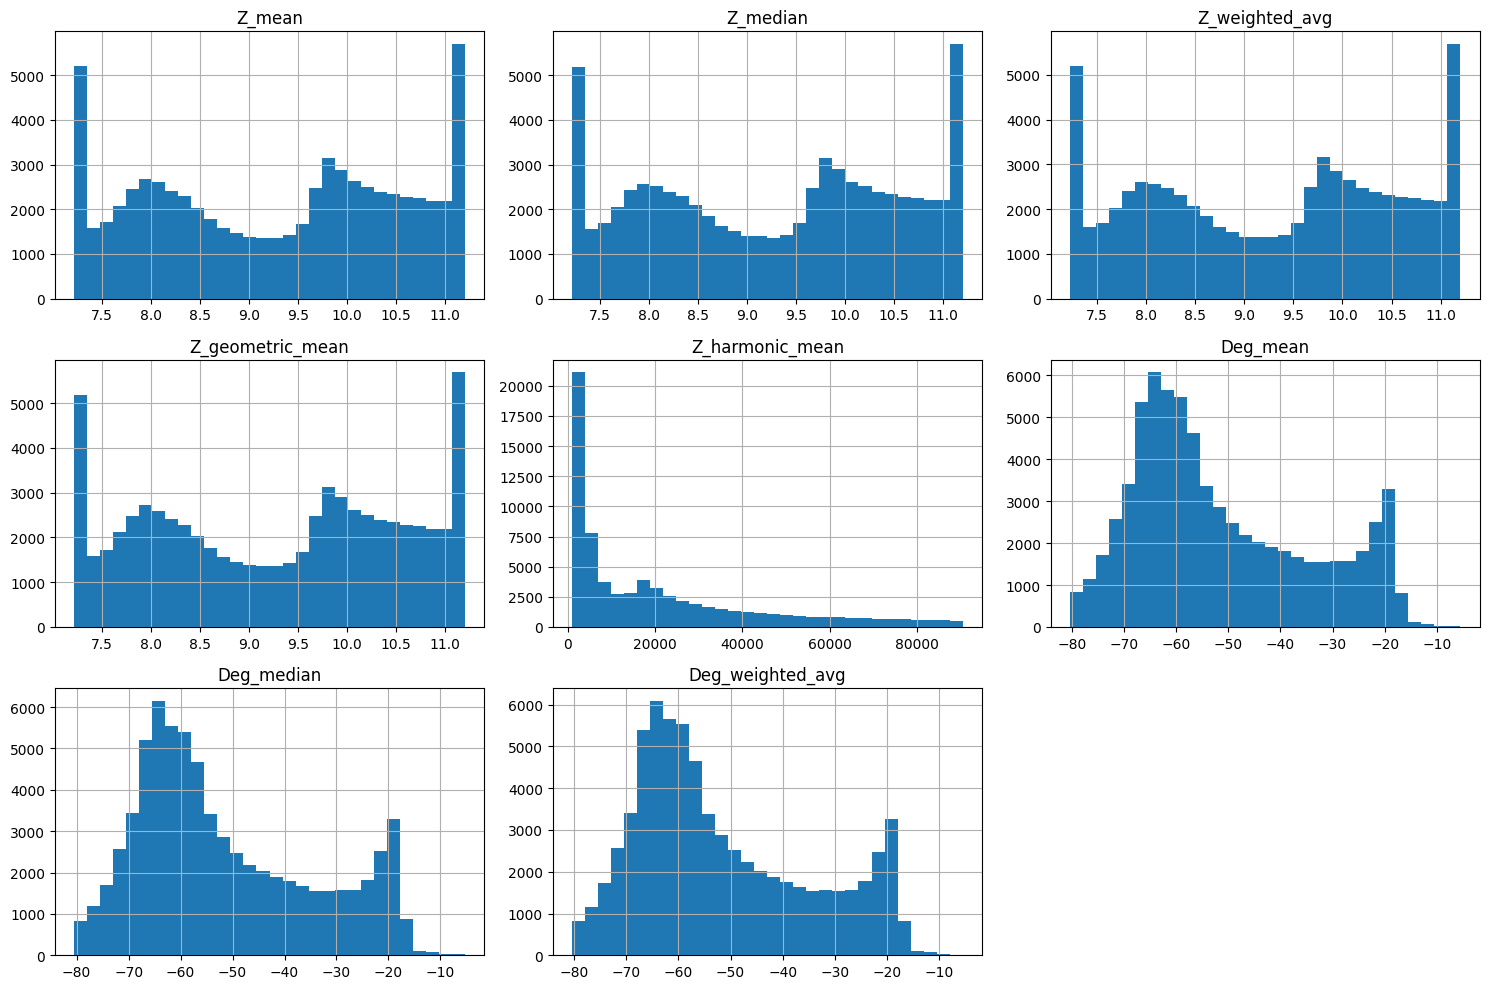

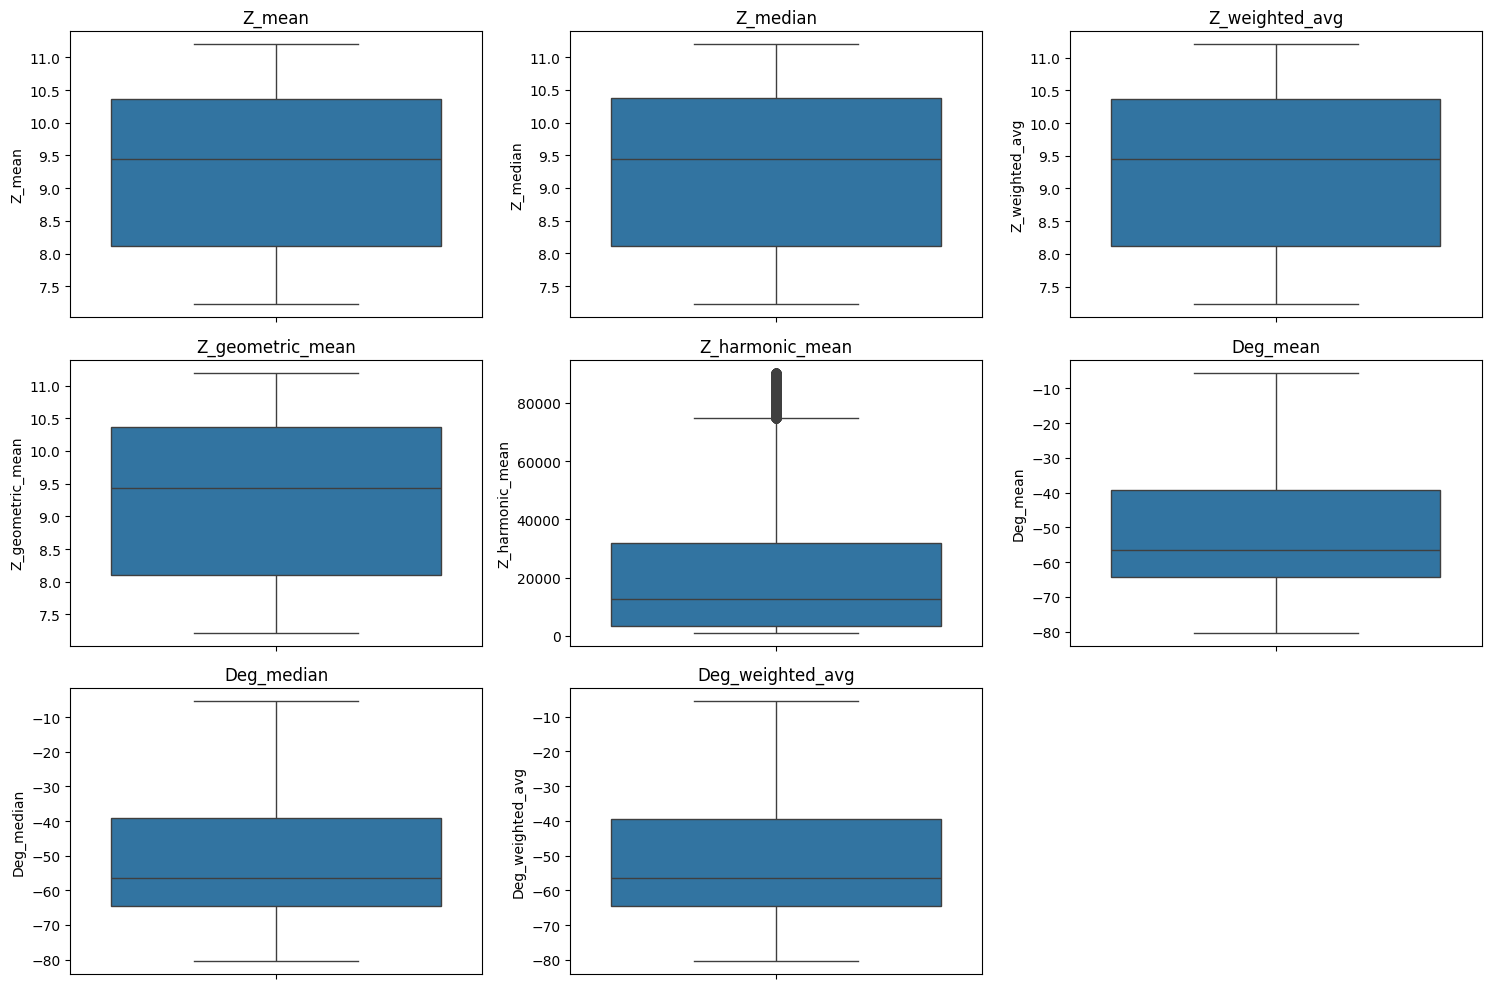

                    Z_mean  Z_median  Z_weighted_avg  Z_geometric_mean  \
Z_mean            1.000000  0.999712        0.999924          0.999970   
Z_median          0.999712  1.000000        0.999695          0.999635   
Z_weighted_avg    0.999924  0.999695        1.000000          0.999801   
Z_geometric_mean  0.999970  0.999635        0.999801          1.000000   
Z_harmonic_mean   0.880329  0.879472        0.880257          0.880339   
Deg_mean         -0.611944 -0.610642       -0.609826         -0.613046   
Deg_median       -0.605396 -0.603976       -0.603056         -0.606650   
Deg_weighted_avg -0.609924 -0.608797       -0.607959         -0.610921   

                  Z_harmonic_mean  Deg_mean  Deg_median  Deg_weighted_avg  
Z_mean                   0.880329 -0.611944   -0.605396         -0.609924  
Z_median                 0.879472 -0.610642   -0.603976         -0.608797  
Z_weighted_avg           0.880257 -0.609826   -0.603056         -0.607959  
Z_geometric_mean         0.88

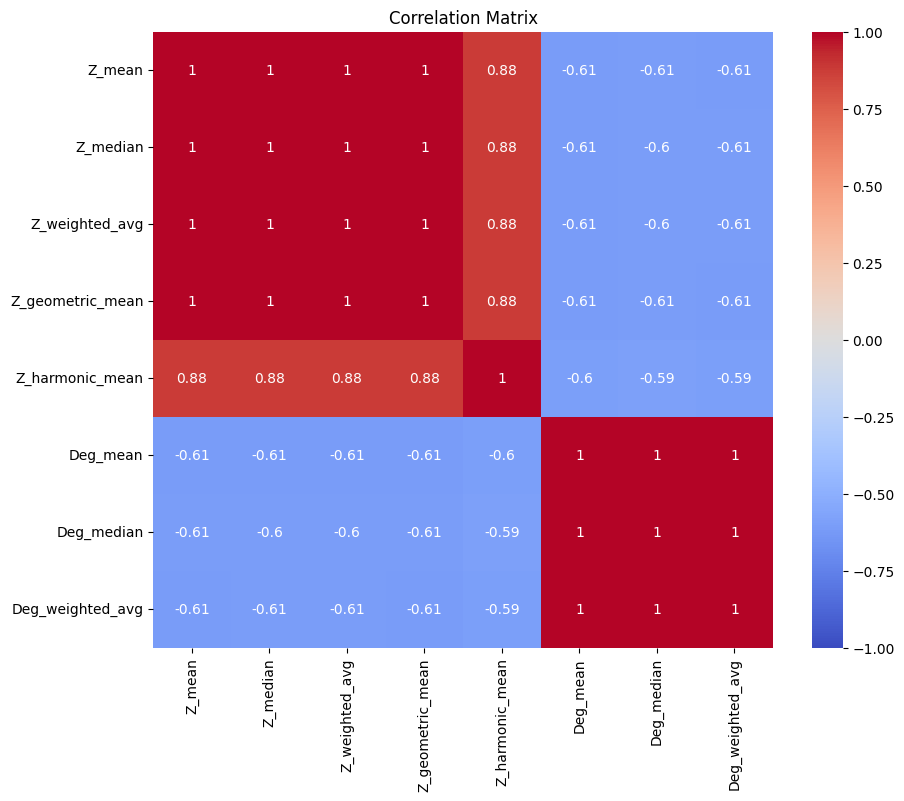

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'zscore_cleaned_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# List of columns to check
columns_to_check = [
    'Z_mean', 'Z_median', 'Z_weighted_avg', 'Z_geometric_mean', 'Z_harmonic_mean',
    'Deg_mean', 'Deg_median', 'Deg_weighted_avg'
]

# Summary statistics
summary_stats = data[columns_to_check].describe()
print(summary_stats)

# Histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    data[column].hist(bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[columns_to_check].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

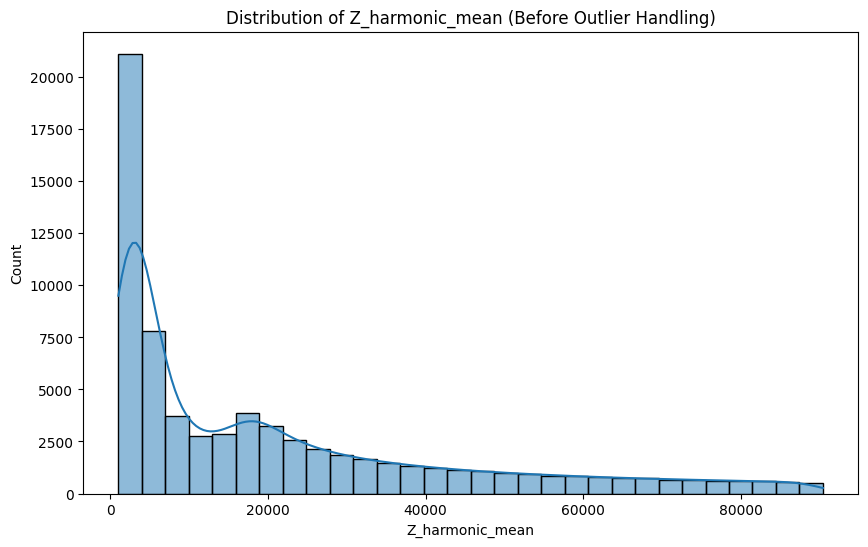

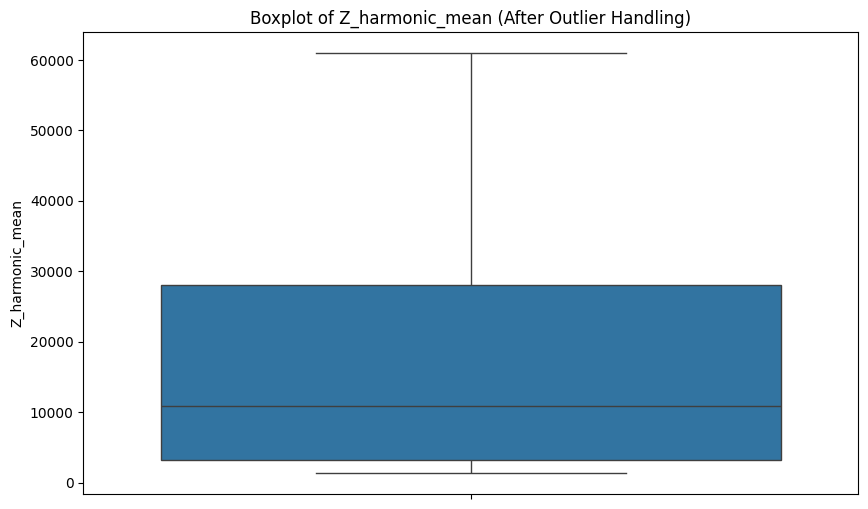

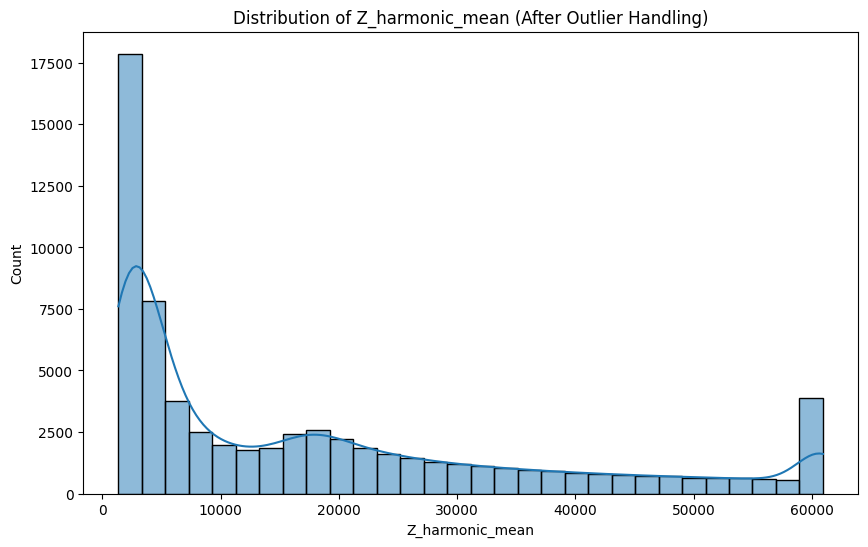

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Load your dataset (replace 'your_file.csv' with your actual file name)
data = pd.read_csv('zscore_cleaned_dataset.csv')

# Step 1: Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Z_harmonic_mean'], kde=True, bins=30)
plt.title('Distribution of Z_harmonic_mean (Before Outlier Handling)')
plt.show()

# Step 2: Remove outliers using the IQR method
Q1 = data['Z_harmonic_mean'].quantile(0.25)  # First quartile
Q3 = data['Z_harmonic_mean'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                                # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within the bounds
data = data[(data['Z_harmonic_mean'] >= lower_bound) & (data['Z_harmonic_mean'] <= upper_bound)]

# Step 3: Use Z-score to further remove outliers
data['zscore'] = zscore(data['Z_harmonic_mean'])
data = data[abs(data['zscore']) < 3]
data.drop(columns=['zscore'], inplace=True)

# Step 4: Optional log transformation
data['Z_harmonic_mean_log'] = np.log1p(data['Z_harmonic_mean'])

# Step 5: Winsorize the outliers (alternative)
data['Z_harmonic_mean'] = winsorize(data['Z_harmonic_mean'], limits=[0.05, 0.05])

# Visualize the data after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['Z_harmonic_mean'])
plt.title('Boxplot of Z_harmonic_mean (After Outlier Handling)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Z_harmonic_mean'], kde=True, bins=30)
plt.title('Distribution of Z_harmonic_mean (After Outlier Handling)')
plt.show()


In [13]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.
